In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion-reliance-trends/Reliance Trends Fashion.csv


# Initial Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

**Reading the dataset and loading it into dataframe**

In [3]:
df=pd.read_csv('../input/fashion-reliance-trends/Reliance Trends Fashion.csv')

In [4]:
df.head(5)

,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category
0,performax,Typographic Print Track Pants with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441136763008,974,"1,299",https://trends.ajio.com/performax-typographic-...,Men,Activewear
1,performax,Low-Top Lace-Up Sports Shoes,https://assets.ajio.com/medias/sys_master/root...,450137679013,"1,499","1,499",https://trends.ajio.com/performax-low-top-lace...,Men,Activewear
2,teamspirit,Colorblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441133214008,461,549,https://trends.ajio.com/teamspirit-colorblock-...,Men,Activewear
3,performax,Camouflage Print Joggers with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441134776020,"1,189","1,699",https://trends.ajio.com/performax-camouflage-p...,Men,Activewear
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441136539020,425,599,https://trends.ajio.com/teamspirit-reflective-...,Men,Activewear


# Data Cleaning

In [5]:
#Checking no of rows and columns
shape=df.shape
print('No of rows are: {0} and No of columns are: {1}'.format(shape[0],shape[1]))

No of rows are: 31582 and No of columns are: 9


In [6]:
#Checking null values
df.isnull().any()

Brand                      False
Description                False
Image_URL                  False
Product_ID                 False
Discount_Price (in Rs.)    False
Original_Price (in Rs.)    False
Product_URL                False
Category_by_gender         False
Category                   False
dtype: bool

As we can see there is no null value

In [7]:
#Checking duplicate values
df.duplicated().sum()

564

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

You can see we have droppend every duplicate values as they are not useful for data analysis.

In [10]:
#getting more info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31018 entries, 0 to 31581
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Brand                    31018 non-null  object
 1   Description              31018 non-null  object
 2   Image_URL                31018 non-null  object
 3   Product_ID               31018 non-null  int64 
 4   Discount_Price (in Rs.)  31018 non-null  object
 5   Original_Price (in Rs.)  31018 non-null  object
 6   Product_URL              31018 non-null  object
 7   Category_by_gender       31018 non-null  object
 8   Category                 31018 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [11]:
#removing , from price
df['Discount_Price (in Rs.)']=df['Discount_Price (in Rs.)'].str.replace(',','')
df['Original_Price (in Rs.)']=df['Original_Price (in Rs.)'].str.replace(',','')


In [12]:
df.head(2)

,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category
0,performax,Typographic Print Track Pants with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441136763008,974,1299,https://trends.ajio.com/performax-typographic-...,Men,Activewear
1,performax,Low-Top Lace-Up Sports Shoes,https://assets.ajio.com/medias/sys_master/root...,450137679013,1499,1499,https://trends.ajio.com/performax-low-top-lace...,Men,Activewear


In [13]:
#Changing the data type of Discount price and original price
df['Discount_Price (in Rs.)']=df['Discount_Price (in Rs.)'].astype('float')
df['Original_Price (in Rs.)']=df['Original_Price (in Rs.)'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31018 entries, 0 to 31581
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    31018 non-null  object 
 1   Description              31018 non-null  object 
 2   Image_URL                31018 non-null  object 
 3   Product_ID               31018 non-null  int64  
 4   Discount_Price (in Rs.)  31018 non-null  float64
 5   Original_Price (in Rs.)  31018 non-null  float64
 6   Product_URL              31018 non-null  object 
 7   Category_by_gender       31018 non-null  object 
 8   Category                 31018 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.4+ MB


In [15]:
df.columns

Index(['Brand', 'Description', 'Image_URL', 'Product_ID',
       'Discount_Price (in Rs.)', 'Original_Price (in Rs.)', 'Product_URL',
       'Category_by_gender', 'Category'],
      dtype='object')

The data is cleaned now.


# Basic exploration

In [16]:
df['Brand'].describe()

count         31018
unique          191
top       performax
freq           3020
Name: Brand, dtype: object

There are total 191 unique brands available in store. 

<AxesSubplot:>

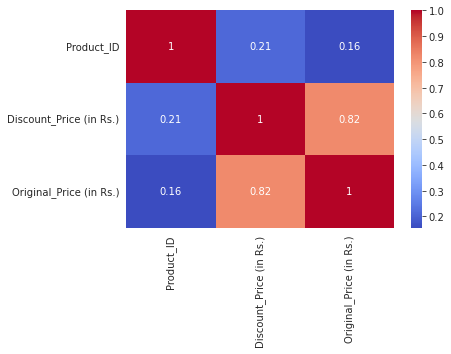

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [18]:
value_count = pd.DataFrame({'Category in store':df['Category'].value_counts()})
value_count.style.background_gradient(cmap='hot')

,Category in store
Topwear,6965
Westernwear,6432
Footwear,6005
Ethnicwear,5110
Bottomwear,2960
Activewear,2132
Fusionwear,993
Lingerie,325
Innerwear,96


We have greater number of topwears and lowest numbers of innerwear in our store.

# Exploratory Data Analysis

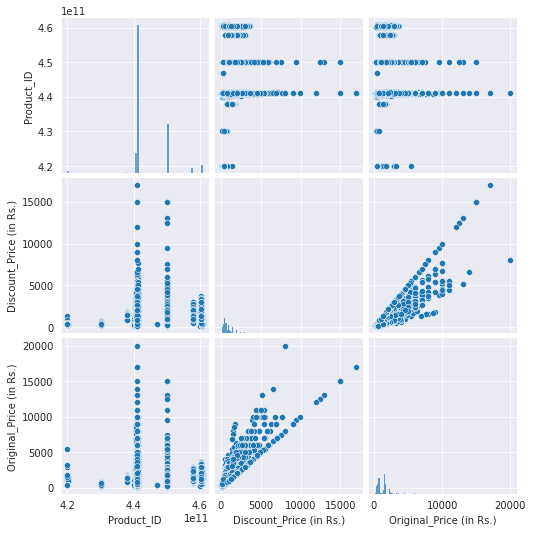

In [19]:

sns.pairplot(df)

<AxesSubplot:title={'center':'Original price vs Discounts'}, xlabel='Original_Price (in Rs.)', ylabel='Discount_Price (in Rs.)'>

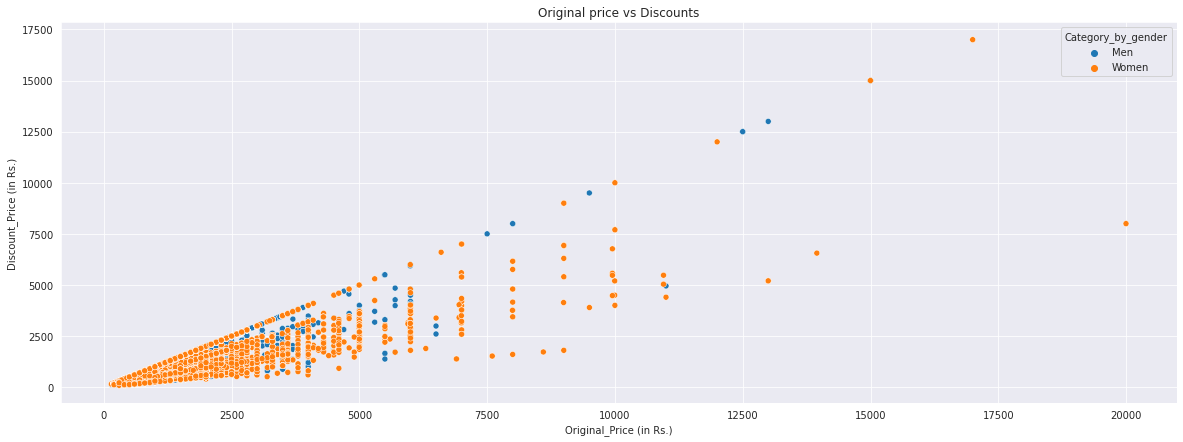

In [20]:
plt.figure(figsize=(20,7))
plt.title('Original price vs Discounts')
sns.scatterplot(x=df['Original_Price (in Rs.)'],y=df['Discount_Price (in Rs.)'],data = df,hue='Category_by_gender')

In [21]:
df.head(1)

,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category
0,performax,Typographic Print Track Pants with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441136763008,974.0,1299.0,https://trends.ajio.com/performax-typographic-...,Men,Activewear


Text(0.5, 1.0, 'Category available in terms of gender')

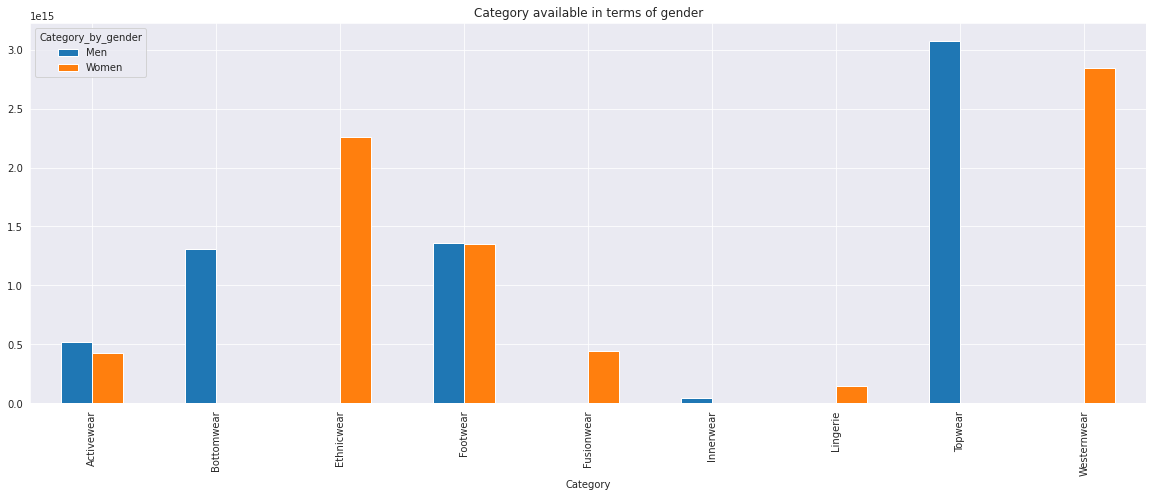

In [22]:

df1=pd.pivot_table(df,values='Product_ID' , index=['Category'],columns=['Category_by_gender'],fill_value=0, aggfunc=np.sum)
df1.plot(kind='bar', figsize=(20,7))
plt.title('Category available in terms of gender')

So this is a great insight. Either the data is not suffecient of store is really running out in certain categories and they need to bring supplies.

<AxesSubplot:xlabel='Category', ylabel='Discount_Price (in Rs.)'>

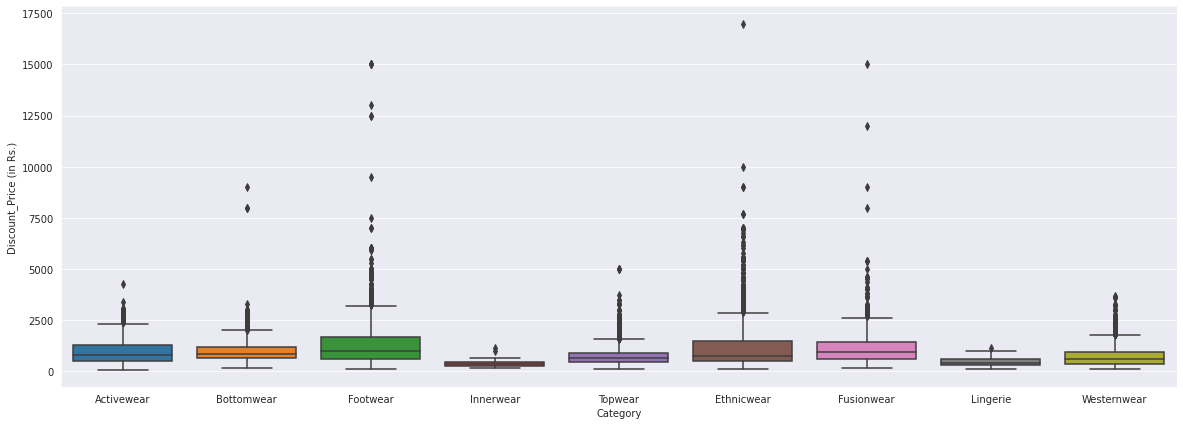

In [23]:
plt.figure(figsize=(20,7))
sns.boxplot(x=df['Category'],y=df['Discount_Price (in Rs.)'])

Footwear is having the maximun discounts. innearwear is having the least discount.

In [24]:
diff = df['Original_Price (in Rs.)'] - df['Discount_Price (in Rs.)']
DisPer= diff*100 / df['Original_Price (in Rs.)']
df['DisPer']=DisPer
df['DisPer']=df['DisPer'].astype('int')

In [25]:
#Top 10 items having maximum discounts 
df[df['DisPer']>=70].sort_values(by='DisPer',ascending=False).head(10)

,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category,DisPer
21728,catwalk,Chunky-Heeled Slip-On Boots,https://assets.ajio.com/medias/sys_master/root...,450144661001,599.0,3995.0,https://trends.ajio.com/catwalk-chunky-heeled-...,Women,Footwear,85
21652,catwalk,Textured Casual Shoes with Velcro Closure,https://assets.ajio.com/medias/sys_master/root...,450132182001,511.0,3195.0,https://trends.ajio.com/catwalk-textured-casua...,Women,Footwear,84
21063,catwalk,Animal Print Boat Shoes,https://assets.ajio.com/medias/sys_master/root...,450144669001,599.0,2995.0,https://trends.ajio.com/catwalk-animal-print-b...,Women,Footwear,80
21073,catwalk,Boat Shoes with Knot Accent,https://assets.ajio.com/medias/sys_master/root...,450144667003,559.0,2795.0,https://trends.ajio.com/catwalk-boat-shoes-wit...,Women,Footwear,80
21617,catwalk,Strappy Sandals with Embellished Heels,https://assets.ajio.com/medias/sys_master/root...,450139278001,679.0,3395.0,https://trends.ajio.com/catwalk-strappy-sandal...,Women,Footwear,80
6393,buckaroo,Powell Slip-On Leather Casual Shoes,https://assets.ajio.com/medias/sys_master/root...,450138977003,799.0,3995.0,https://trends.ajio.com/buckaroo-powell-slip-o...,Men,Footwear,80
17802,swadesh,Chanderi Straight Kurta with Sequinned Yoke-Pr...,https://assets.ajio.com/medias/sys_master/root...,440822735001,760.0,3799.0,https://trends.ajio.com/swadesh-chanderi-strai...,Women,Ethnicwear,79
17612,swadesh,Printed Panelled Flared Kurta with Pockets,https://assets.ajio.com/medias/sys_master/root...,440824533002,1800.0,8999.0,https://trends.ajio.com/swadesh-printed-panell...,Women,Ethnicwear,79
24531,swadesh,Bagru Handblock Print Chanderi Top,https://assets.ajio.com/medias/sys_master/root...,440746069003,720.0,3599.0,https://trends.ajio.com/swadesh-bagru-handbloc...,Women,Fusionwear,79
17243,swadesh,Textured Printed Panelled A-line Kurta,https://assets.ajio.com/medias/sys_master/root...,440824526001,1520.0,7599.0,https://trends.ajio.com/swadesh-textured-print...,Women,Ethnicwear,79


Above are the Top 10 items having maximum discounts 

Text(0.5, 1.0, 'Top 3 Brands')

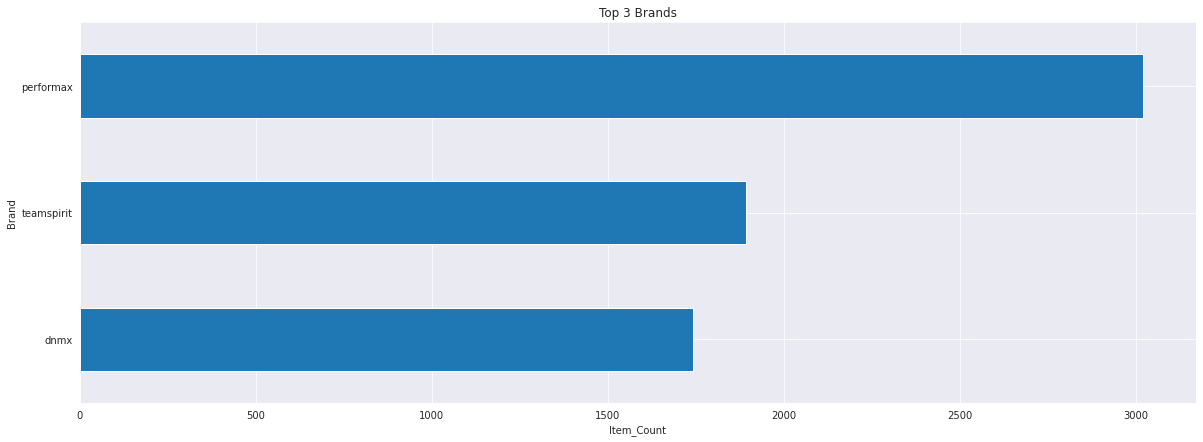

In [26]:
#displaying top 3 brands in terms of quantity present in store
plt.figure(figsize=(20,7))
df['Brand'].value_counts().head(3).sort_values().plot(kind = 'barh')
plt.ylabel('Brand')
plt.xlabel('Item_Count')
plt.title('Top 3 Brands')

Text(0.5, 1.0, 'Discounts based on gender')

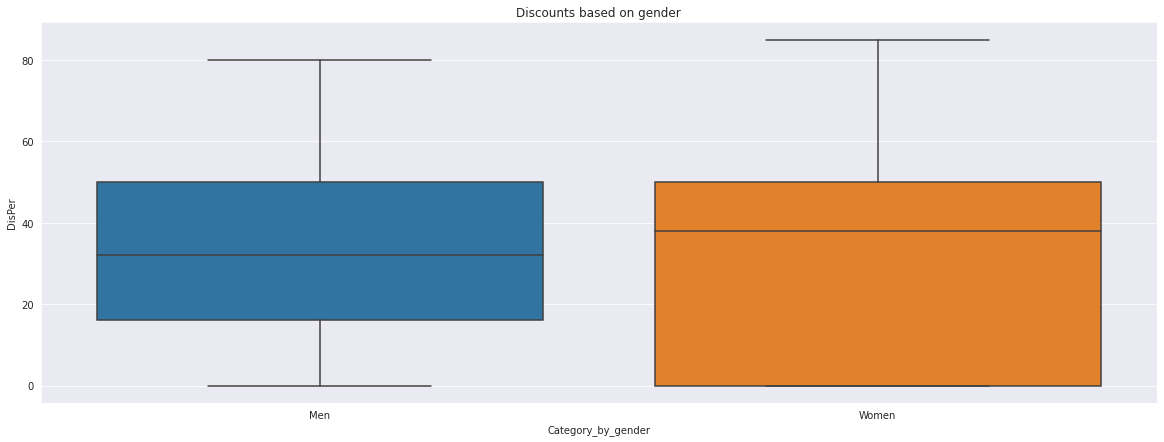

In [27]:
plt.figure(figsize=(20,7))
sns.boxplot(x=df['Category_by_gender'],y=df['DisPer'])
plt.title('Discounts based on gender')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Discounts based on category')

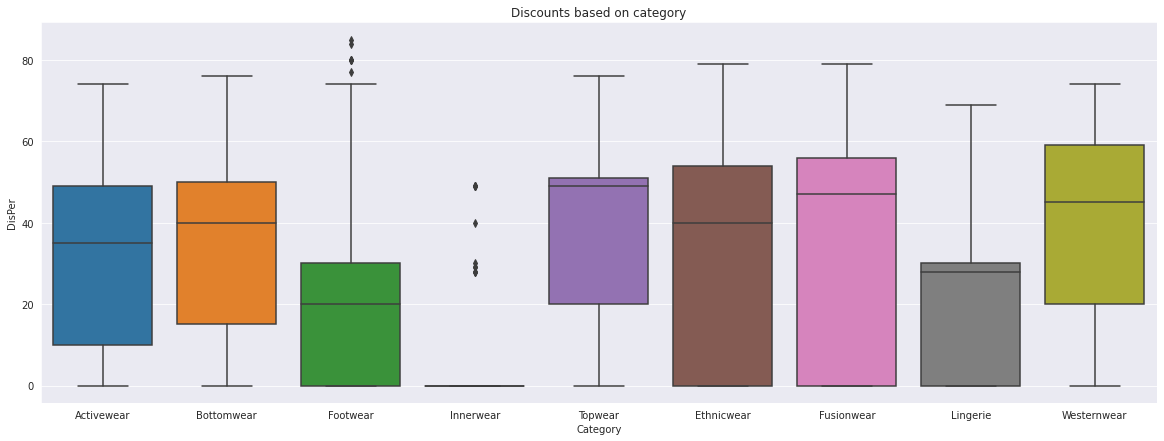

In [28]:
plt.figure(figsize=(20,7))
sns.boxplot(df['Category'],df['DisPer'])
plt.title('Discounts based on category')

### **THANK YOU!!!
### PLease upvote if you like the notebook**